In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [4]:
def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

In [5]:
def gaussian_pdf(x, mu, var):
    return 1/np.sqrt(2*np.pi*var)*np.exp(-(x-mu)**2/(2*var))

In [6]:
def plot_joint_and_conditional(mu, sigma, window=5, N=60):
    x = np.linspace(-window, window, N)
    y = np.linspace(-window, window, N)
    X, Y = np.meshgrid(x, y)
    
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y
    
    Z_joint = multivariate_gaussian(pos, mu, sigma)
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(1,2,1,projection='3d')
    ax.plot_surface(X, Y, Z_joint, rstride=3, cstride=3, linewidth=1, antialiased=True,
                    cmap=cm.viridis)
    #cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)
    z_max = Z_joint.max()*1.1
    ax.set_zlim(0,z_max)
    ax.set_zticks(np.linspace(0,z_max,5))
    ax.view_init(45, 45)
    
    mu_x = mu[0]
    sig_x = sigma[0,0]
    Z_posterior = Z_joint/gaussian_pdf(x, mu_x, sig_x)
    
    ax = fig.add_subplot(1,2,2,projection='3d')
    ax.plot_surface(X, Y, Z_posterior, rstride=3, cstride=3, linewidth=1, antialiased=True,
                    cmap=cm.viridis)
    #cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)
    z_max = Z_posterior.max()*1.1
    ax.set_zlim(0,z_max)
    ax.set_zticks(np.linspace(0,z_max,5))
    ax.view_init(45, 45)

    plt.show()

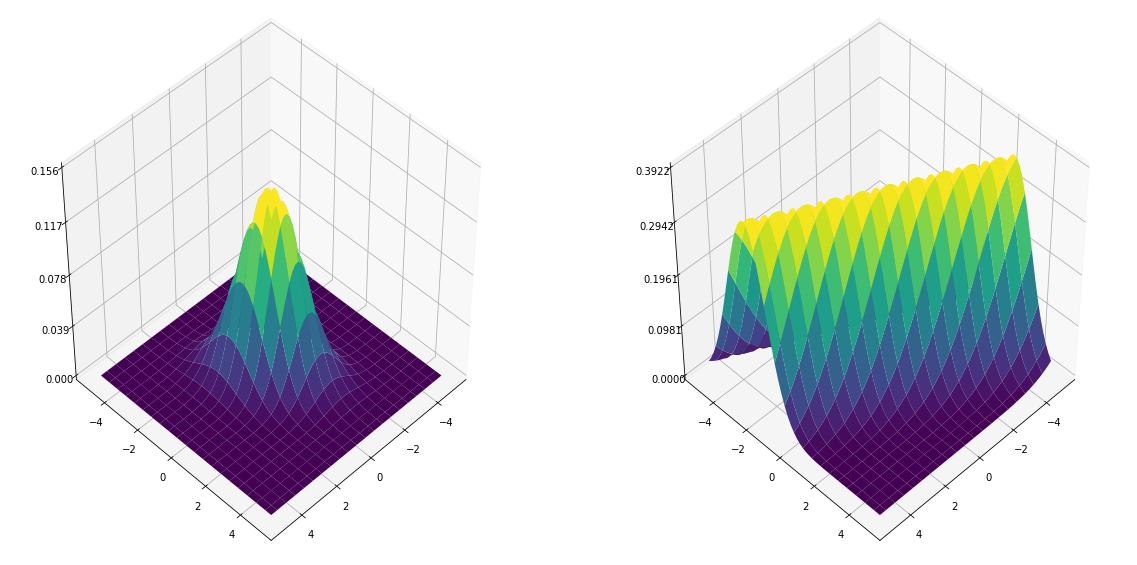

In [7]:
mu = np.array([0., 0.])
sigma = np.array([[ 1. , -.5], 
                  [-.5,  1.5]])
plot_joint_and_conditional(mu, sigma, 5)

In [8]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools

In [9]:
py.init_notebook_mode(connected=True) 

In [10]:
def plot_joint_and_conditional_plotly(mu, sigma, window=5, N=60):
    
    x = np.linspace(-window, window, N)
    y = np.linspace(-window, window, N)
    X, Y = np.meshgrid(x, y)
    
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y
    
    Z_joint = multivariate_gaussian(pos, mu, sigma)
    
    mu_x = mu[0]
    sig_x = sigma[0,0]
    Z_posterior = Z_joint/gaussian_pdf(x, mu_x, sig_x)
    
    scene = dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
    
    fig = tools.make_subplots(rows=1, cols=2,
                          specs=[[{'is_3d': True}, {'is_3d': True}]])

    fig.append_trace(dict(type='surface', x=X, y=Y, z=Z_joint, colorscale='Viridis',
                      scene='scene1', showscale=False), 1, 1)
    fig.append_trace(dict(type='surface', x=X, y=Y, z=Z_posterior, colorscale='RdBu',
                      scene='scene2', showscale=False), 1, 2)
    
    fig['layout'].update(title='joint and conditional probability distributions',
                     height=800, width=1200)
    fig['layout']['scene1'].update(scene)
    fig['layout']['scene2'].update(scene)
    
    py.iplot(fig)

In [14]:
mu = np.array([0., 0.])
sigx = 2.
sigy = 1.
cov = .5
sigma = np.array([[ sigx , cov], 
                  [cov,  sigy]])
plot_joint_and_conditional_plotly(mu, sigma, 3.5, 100)

This is the format of your plot grid:
[ (1,1) scene1 ]  [ (1,2) scene2 ]

